In [4]:
# Cell 1: Import necessary libraries
import numpy as np
from scipy.io import wavfile
import os
import matplotlib.pyplot as plt
from pydub import AudioSegment
import zipfile

Cell 2: Markdown cell for explanation
We first import the necessary libraries. We will use numpy and scipy for the Fourier Transform, os for file operations, matplotlib for plotting, pydub for converting MP3 to WAV, and zipfile for extracting zip files.

In [5]:
# Cell 3: Define necessary functions
def extract_zip_files(zip_file, extract_dir):
    with zipfile.ZipFile(zip_file, 'r') as zip_ref:
        zip_ref.extractall(extract_dir)

def convert_mp3_to_wav(mp3_file):
    audio = AudioSegment.from_mp3(mp3_file)
    wav_file = mp3_file.replace('.mp3', '.wav')
    audio.export(wav_file, format='wav')
    return wav_file

def get_frequency_response(wav_file):
    # Read file
    sample_rate, data = wavfile.read(wav_file)
    # Perform Fourier Transform
    frequencies = np.fft.rfftfreq(data.size, d=1./sample_rate)
    amplitudes = np.abs(np.fft.rfft(data)/data.size)
    return frequencies, amplitudes

Cell 4: Markdown cell for explanation
We define three functions: `extract_zip_files` to extract all files from a zip file, `convert_mp3_to_wav` to convert MP3 files to WAV format, and `get_frequency_response` to perform Fourier Transform on a WAV file and return the frequencies and their corresponding amplitudes.

In [9]:
ZIP_PATH = "data/audio_samples.zip"
TMP_PATH = ".tmp/"

# Loop through each zip file
extract_zip_files(ZIP_PATH, TMP_PATH)

audio_files = [f for f in os.listdir(TMP_PATH) if f.endswith('.mp3')]

ValueError: x and y must have same first dimension, but have shapes (529201,) and (529200, 2)

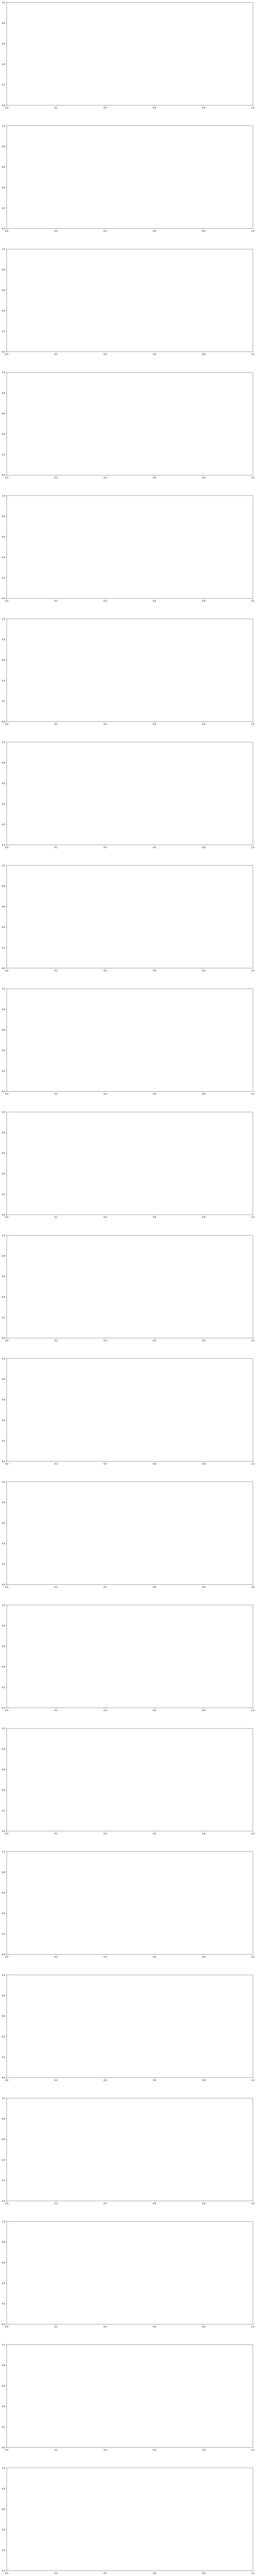

In [13]:
# Cell 5: Main code to process audio files and plot frequency response

# Initialize a figure and axes for subplots
fig, axs = plt.subplots(len(audio_files), 1, figsize=(20, 10*len(audio_files)))

# Loop through each file
for i, file in enumerate(audio_files):
    wav_file = convert_mp3_to_wav(os.path.join(TMP_PATH, file))
    frequencies, amplitudes = get_frequency_response(wav_file)
    
    # Plot frequency response on a new subplot
    axs[i].plot(frequencies, amplitudes)
    axs[i].set_xscale('log')
    axs[i].set_title(f'Frequency response of {file}')
    axs[i].set_xlabel('Frequency [Hz]')
    axs[i].set_ylabel('Amplitude')

# Show the plot
plt.tight_layout()
plt.show()

Cell 6: Markdown cell for explanation
We first get all zip files in the 'data' directory. For each zip file, we extract it to a directory with the same name, get all MP3 files in the extracted directory, convert each MP3 file to WAV format, perform Fourier Transform on the WAV file, and plot the frequency response.